# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [51]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD
from sklearn import metrics                                                                      # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [52]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Load the image file of dataset
images = np.load('/content/drive/My Drive/ColabNotebooks/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [54]:
images.shape

(4750, 128, 128, 3)

We have 4750 images.<br/>
Each image has dimensions of 128 pixels in height and 128 pixels in width.<br/>
Each image is represented in RGB color space with 3 color channels.

In [55]:
labels.shape

(4750, 1)

We have 4750 labels, one for each of the images

In [56]:
images[1] # to have a look at the format of the images object


array([[[ 30,  47,  63],
        [ 30,  50,  60],
        [ 34,  47,  63],
        ...,
        [ 48,  59,  74],
        [ 42,  54,  69],
        [ 44,  56,  70]],

       [[ 30,  49,  67],
        [ 26,  47,  60],
        [ 30,  40,  61],
        ...,
        [ 50,  64,  76],
        [ 52,  67,  78],
        [ 45,  56,  72]],

       [[ 23,  46,  65],
        [ 27,  48,  64],
        [ 25,  40,  59],
        ...,
        [ 39,  59,  81],
        [ 47,  62,  79],
        [ 42,  54,  69]],

       ...,

       [[ 32,  54,  72],
        [ 58,  82,  95],
        [ 72,  96, 109],
        ...,
        [ 60,  80,  99],
        [ 50,  72,  92],
        [ 45,  64,  84]],

       [[ 31,  51,  67],
        [ 25,  50,  64],
        [ 38,  64,  80],
        ...,
        [ 63,  83, 101],
        [ 57,  78,  96],
        [ 50,  69,  89]],

       [[ 18,  32,  56],
        [ 16,  27,  50],
        [ 34,  49,  71],
        ...,
        [ 59,  84, 101],
        [ 55,  80,  97],
        [ 39,  59,  82]]

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [57]:
def plot_images(images,labels):
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

In [58]:
np.unique(labels)

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

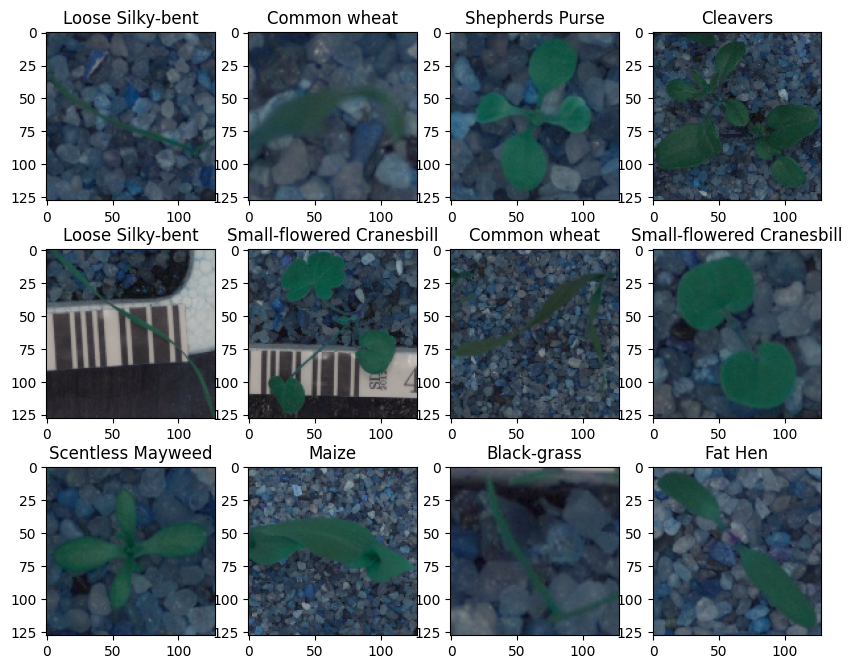

In [59]:
plot_images(images,labels)

There are a total of 12 categories of images 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'.<BR/>
Each of these have a different type of leaves and stem. The size of the leaves, length , breath , width and sometimes color seems to differ between categories

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

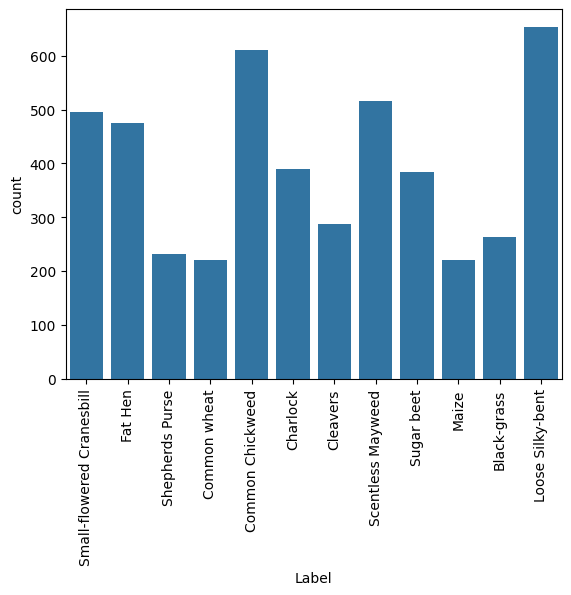

In [60]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

The dataset provided seems to have good count on all the  12 categories, even though they are not equal, we still got good count of datasets, although more count is always more useful.<br/>
According to the count plot, the highest number of the plant is Loose-Silky-Bent, and the lowest number of the plants are Maize and Common Wheat.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [61]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

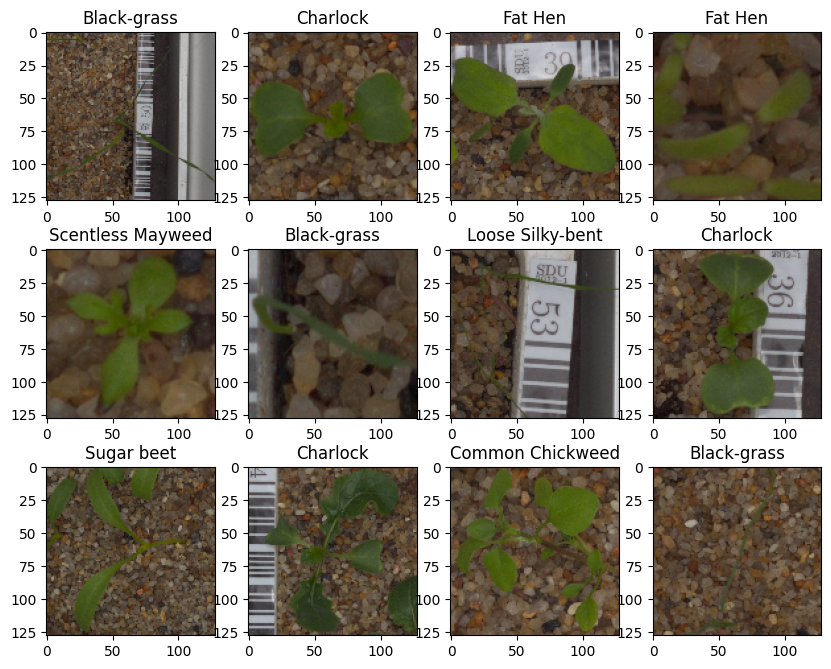

In [62]:
plot_images(images,labels)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [63]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

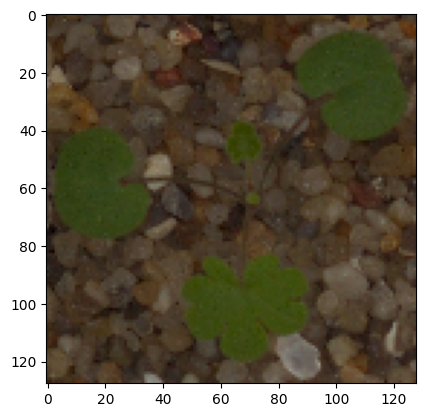

In [64]:
plt.imshow(images[1]) # image before resizing, looks clear

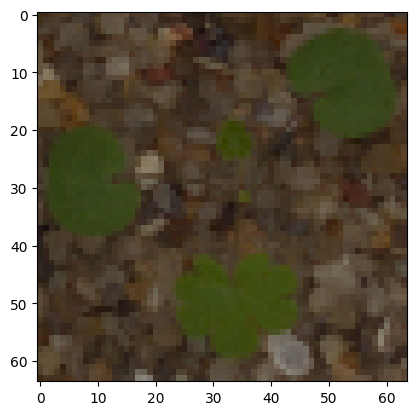

In [65]:
plt.imshow(images_decreased[1])  # image after resizing, looks blur but the shape of the leaves and size looks good to proceed with model training

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [66]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size= 0.1, random_state=42,stratify=labels)   # spilt the dateset with 0.1 for testset
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp , test_size=0.1, random_state=42,stratify=y_temp)                       # spilt the dateset with 0.1 for validation

In [67]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


We have 3847 data for training , 428 for validation and 475 for testing

### Encode the target labels

In [68]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [69]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

After categorical encoding, we have 12 categories

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [70]:
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [71]:
# Clearing backend
backend.clear_session()

In [72]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [73]:
# Intializing a sequential model
model1 = Sequential()

model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))
model1.add(Flatten())

model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(12, activation='softmax'))

opt=Adam()
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

Fitting the model on the train data

In [74]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 3s - loss: 2.4520 - accuracy: 0.1149 - val_loss: 2.4350 - val_accuracy: 0.1285 - 3s/epoch - 24ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3371 - accuracy: 0.2202 - val_loss: 2.0568 - val_accuracy: 0.3692 - 1s/epoch - 9ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0296 - accuracy: 0.3296 - val_loss: 1.8200 - val_accuracy: 0.3785 - 1s/epoch - 9ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8756 - accuracy: 0.3644 - val_loss: 1.6824 - val_accuracy: 0.4299 - 1s/epoch - 10ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7867 - accuracy: 0.3748 - val_loss: 1.6463 - val_accuracy: 0.4346 - 1s/epoch - 11ms/step
Epoch 6/30
121/121 - 2s - loss: 1.7001 - accuracy: 0.3912 - val_loss: 1.5013 - val_accuracy: 0.4743 - 2s/epoch - 12ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6751 - accuracy: 0.4008 - val_loss: 1.4103 - val_accuracy: 0.4953 - 1s/epoch - 12ms/step
Epoch 8/30
121/121 - 2s - loss: 1.5974 - accuracy: 0.4141 - val_loss: 1.3242 - val_accuracy: 0.5537 - 2s/epoch - 15ms/step
Epoch 9/30
121/121

**Model Evaluation**

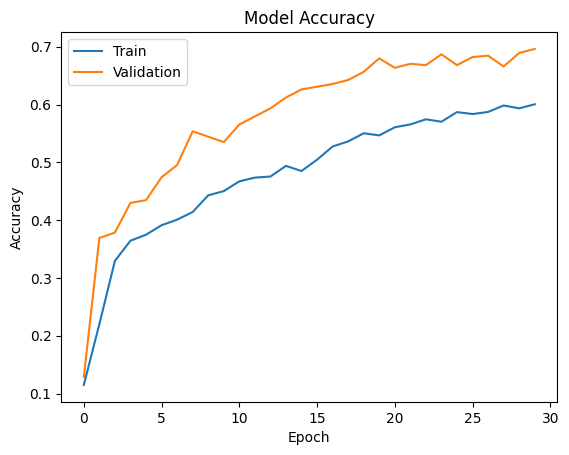

In [75]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [76]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9545 - accuracy: 0.7305 - 85ms/epoch - 6ms/step


For model1  we got a accuracy of 73%

**Plotting the Confusion Matrix**

In [77]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 [==============================] - 0s 6ms/step


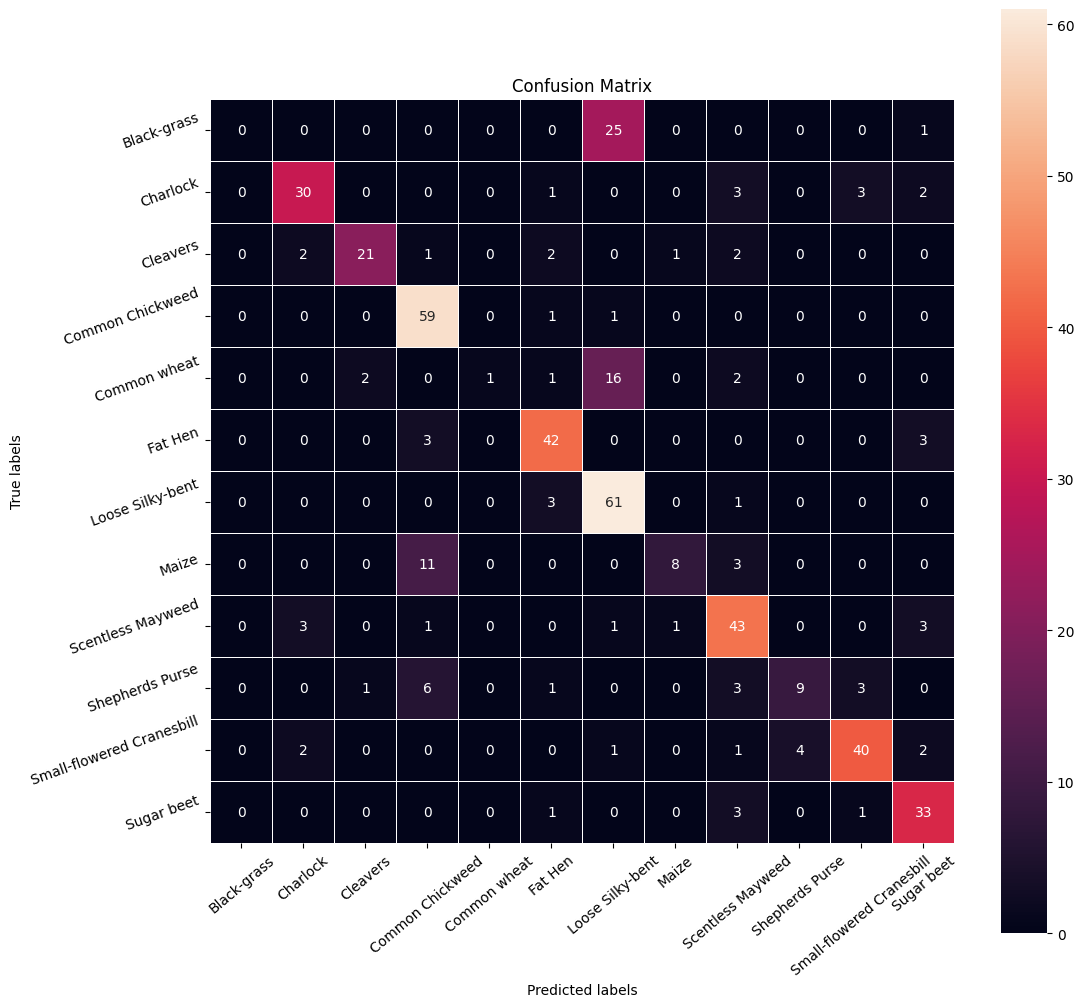

In [78]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

In [79]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.81      0.77      0.79        39
           2       0.88      0.72      0.79        29
           3       0.73      0.97      0.83        61
           4       1.00      0.05      0.09        22
           5       0.81      0.88      0.84        48
           6       0.58      0.94      0.72        65
           7       0.80      0.36      0.50        22
           8       0.70      0.83      0.76        52
           9       0.69      0.39      0.50        23
          10       0.85      0.80      0.82        50
          11       0.75      0.87      0.80        38

    accuracy                           0.73       475
   macro avg       0.72      0.63      0.62       475
weighted avg       0.72      0.73      0.69       475



## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**



In [80]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [81]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

We will use ImageDataGenerator that will perform data augmentation on images by randomly rotating them within the range of -20 to +20 degrees and filling in any new pixels using the nearest pixel value from the original image.

In [82]:
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [83]:
# Intializing a sequential model
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
model2.add(Dense(12, activation='softmax'))

# /initialize Adam Optimimzer
opt=Adam()
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [84]:
history_2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       shuffle=False),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 64,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])


Epoch 1/30
60/60 [==============================] - 6s 73ms/step - loss: 2.1436 - accuracy: 0.2371 - val_loss: 2.4227 - val_accuracy: 0.1308 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 6s 102ms/step - loss: 1.7338 - accuracy: 0.3931 - val_loss: 2.3107 - val_accuracy: 0.2360 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 6s 96ms/step - loss: 1.5267 - accuracy: 0.4753 - val_loss: 2.2494 - val_accuracy: 0.3154 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 4s 71ms/step - loss: 1.4229 - accuracy: 0.5155 - val_loss: 2.0726 - val_accuracy: 0.4299 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 4s 72ms/step - loss: 1.3088 - accuracy: 0.5482 - val_loss: 1.9369 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 6s 95ms/step - loss: 1.2202 - accuracy: 0.5646 - val_loss: 2.0120 - val_accuracy: 0.3832 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 4s 74ms/step - loss: 1.

**Model Evaluation**

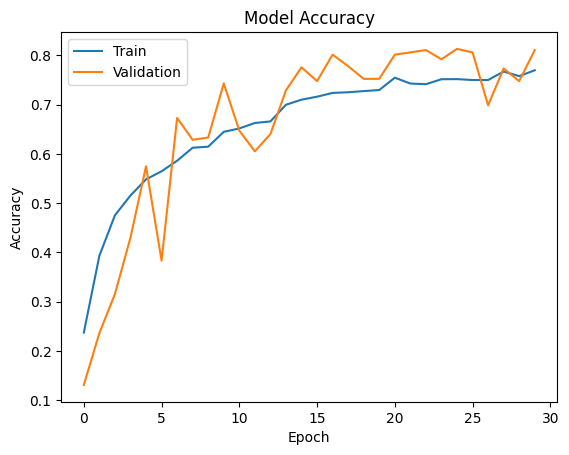

In [85]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [86]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.7181 - accuracy: 0.8084 - 89ms/epoch - 6ms/step


Model 2 accuracy has significatly improved to 80%

**Plotting the Confusion Matrix**

In [87]:
# Code to obtain the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


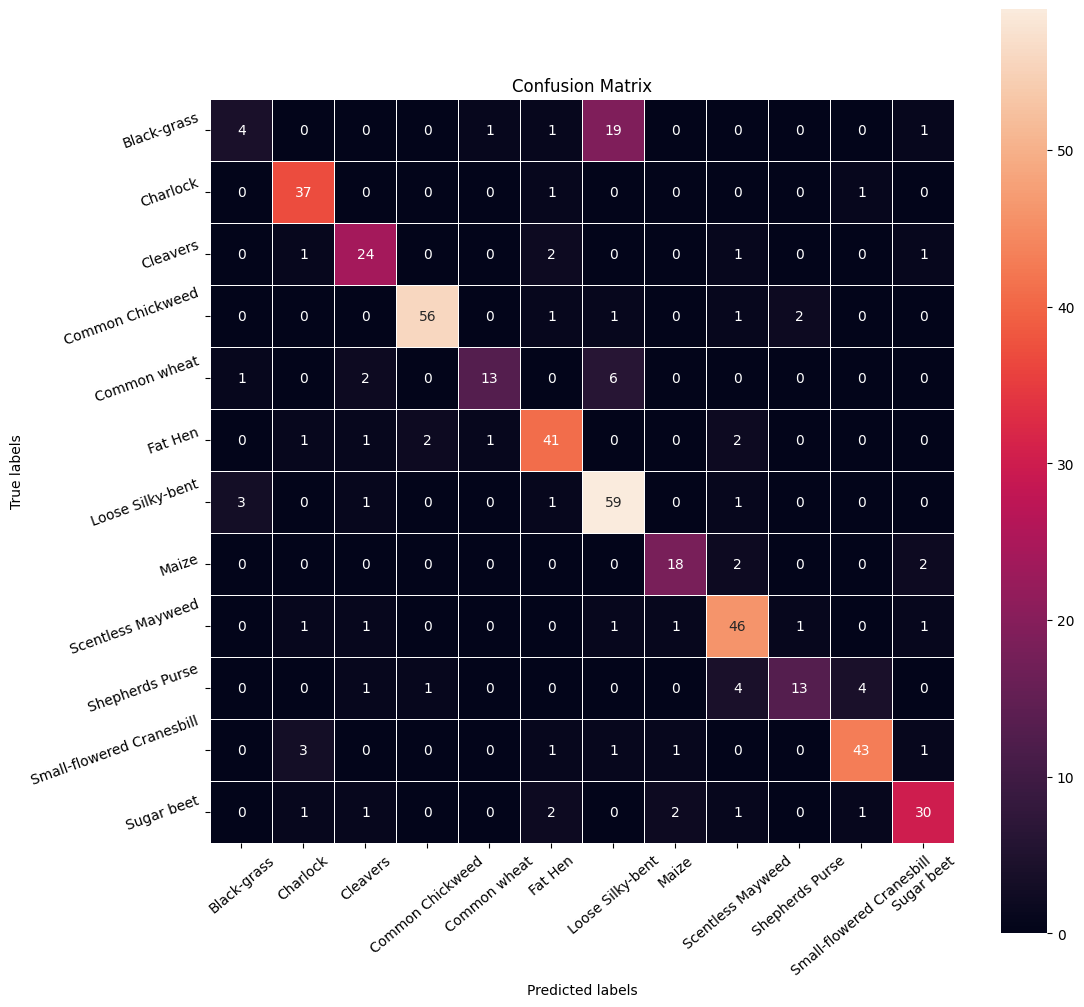

In [88]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [89]:
# Plotting the classification report
cr= metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.15      0.24        26
           1       0.84      0.95      0.89        39
           2       0.77      0.83      0.80        29
           3       0.95      0.92      0.93        61
           4       0.87      0.59      0.70        22
           5       0.82      0.85      0.84        48
           6       0.68      0.91      0.78        65
           7       0.82      0.82      0.82        22
           8       0.79      0.88      0.84        52
           9       0.81      0.57      0.67        23
          10       0.88      0.86      0.87        50
          11       0.83      0.79      0.81        38

    accuracy                           0.81       475
   macro avg       0.80      0.76      0.76       475
weighted avg       0.80      0.81      0.80       475



Lets add one more layer of Conv2D, MaxPooling2D and BatchNormalization

In [90]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [91]:
# Intializing a sequential model
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

model3.add(MaxPooling2D((2, 2), padding = 'same'))

model3.add(Conv2D(48, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(BatchNormalization())

model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# model3 a fully connected dense layer with 16 neurons
model3.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model3.add(Dropout(0.3))
model3.add(Dense(12, activation='softmax'))

# /initialize Adam Optimimzer
opt=Adam()
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 48)        27696     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 48)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 48)        192       
 Normalization)                                                  
                                                        

In [92]:
history_3 = model3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       shuffle=False),
                                       epochs=30,
                                       steps_per_epoch=X_train_normalized.shape[0] // 64,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 6s 73ms/step - loss: 2.2838 - accuracy: 0.2384 - val_loss: 2.4706 - val_accuracy: 0.1075 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 84ms/step - loss: 1.9786 - accuracy: 0.3600 - val_loss: 2.7366 - val_accuracy: 0.1075 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 5s 82ms/step - loss: 1.8043 - accuracy: 0.4264 - val_loss: 3.2284 - val_accuracy: 0.1075 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - ETA: 0s - loss: 1.6129 - accuracy: 0.4867
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 [==============================] - 5s 87ms/step - loss: 1.6129 - accuracy: 0.4867 - val_loss: 4.0963 - val_accuracy: 0.1075 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 7s 108ms/step - loss: 1.4377 - accuracy: 0.5123 - val_loss: 5.0128 - val_accuracy: 0.1075 - lr: 5.0000e-04
Epoch 6/30
60/60 [==============================] - 4s 71ms/step -

**Model Evaluation**

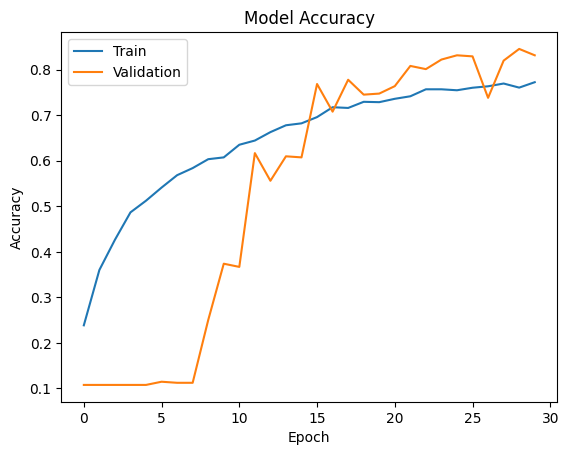

In [93]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [94]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6053 - accuracy: 0.7853 - 74ms/epoch - 5ms/step


**Plotting the Confusion Matrix**

In [95]:
# Code to obtain the output probabilities
y_pred=model3.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


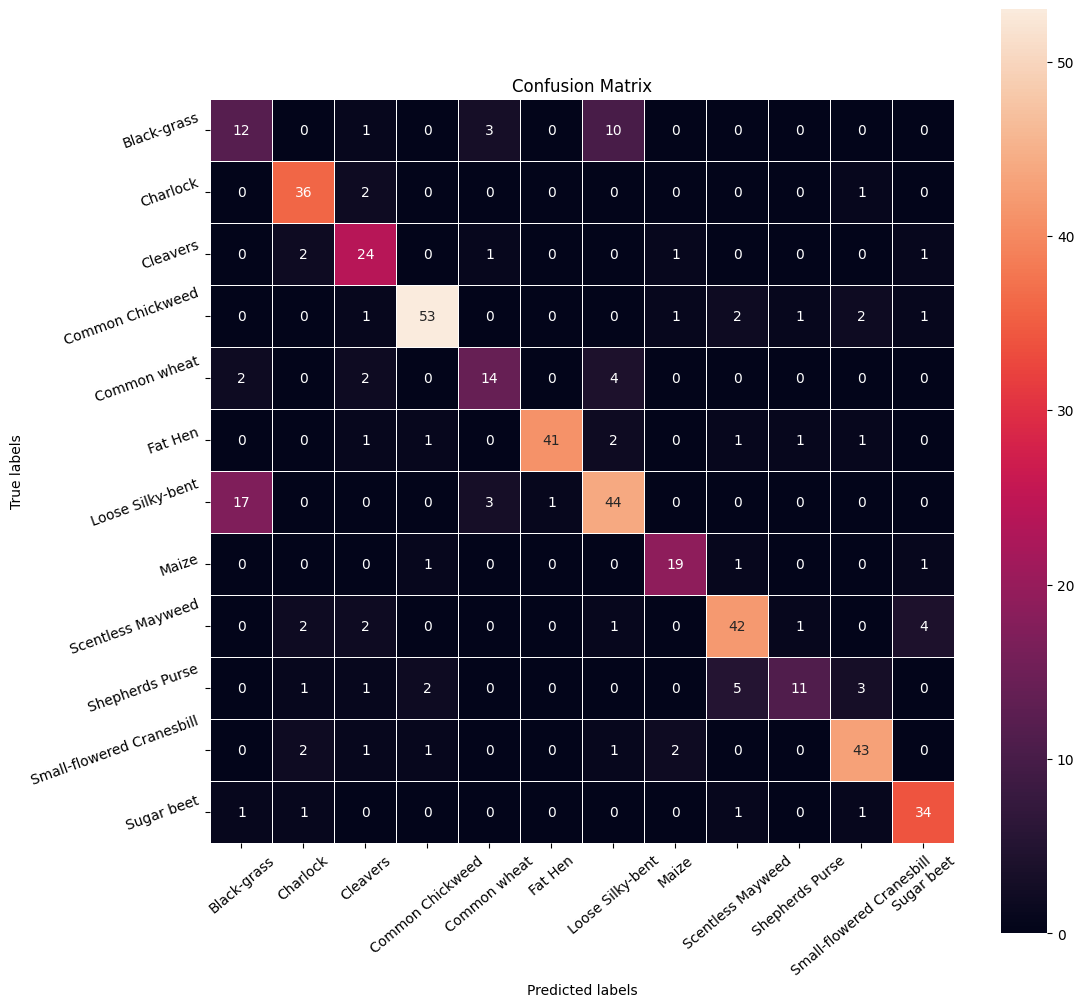

In [96]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [97]:
# Plotting the classification report
cr= metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.38      0.46      0.41        26
           1       0.82      0.92      0.87        39
           2       0.69      0.83      0.75        29
           3       0.91      0.87      0.89        61
           4       0.67      0.64      0.65        22
           5       0.98      0.85      0.91        48
           6       0.71      0.68      0.69        65
           7       0.83      0.86      0.84        22
           8       0.81      0.81      0.81        52
           9       0.79      0.48      0.59        23
          10       0.84      0.86      0.85        50
          11       0.83      0.89      0.86        38

    accuracy                           0.79       475
   macro avg       0.77      0.76      0.76       475
weighted avg       0.79      0.79      0.79       475



## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

We have 4750 images.<br/>
Each image has dimensions of 128 pixels in height and 128 pixels in width.<br/>
Each image is represented in RGB color space with 3 color channels.<br/>
There are a total of 12 categories of images 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'

Before creating the models, we do some **data pre processing**
1. Convert the BGR images to RGB images.<br/>
As the images are in BGR, we convert to RGB image
2. Resize the images.<br/>
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

**Data Normalization** <br/>
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.

After data pre processing and data normalization, we have implemented a CNN model - model1 <br/>
**For model1  we got a accuracy of 73%**

To improve the performance we need to do Data Augmentation<br/>

**Data Augmentation**<br/>
We will use 'ImageDataGenerator' that will perform data augmentation on images by randomly rotating them within the range of -20 to +20 degrees and filling in any new pixels using the nearest pixel value from the original image.

**Model 2 accuracy has significatly improved to 80%**

Lets add one more layer of Conv2D, MaxPooling2D and BatchNormalization

**Model 3 accuracy has significatly decreased to 78%**

So we can consider Model 2 as the final model



### Visualizing the prediction

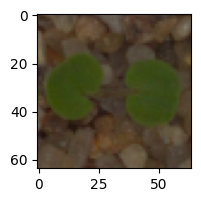

1/1 [==============================] - 0s 93ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


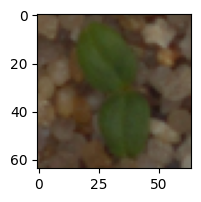

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Cleavers']
True Label Cleavers


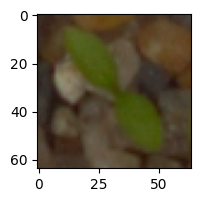

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


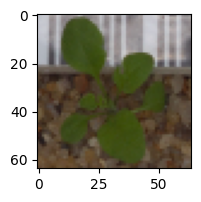

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [98]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()

print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()

print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()

print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()

print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

The Loose-Silky-Bent and Black-Grass  are the most misclassified ones after training. This causes the model to be unable to differentiate both of them and directly affecting the accuracy when predicting the unseen data. The solution could be getting more data-set, appling alternative image processing techniques, more data augmentation or modified or change the current CNN. <br/>
The CNN model can detect and differentiate weed from other plants in the wild with an accuracy of approximately 80%. The proposed system can be extended to work with robotic arms for performing actual weeding operation in large farmland, hereby reducing costs and manual labour while improving crop yield and productivity


_____